In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from function import function

### DATA UNDERSTANDING

In [3]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('credit_record.csv')
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
(1048575, 3) None


In [4]:
raw_credit.groupby('ID').last()

,MONTHS_BALANCE,STATUS
ID,,
5001711,-3,0
5001712,-18,0
5001713,-21,X
5001714,-14,X
5001715,-59,X
...,...,...
5150482,-28,0
5150483,-17,X
5150484,-12,0


In [5]:
raw_application = pd.read_csv('application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [6]:
raw_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
print(df.shape)
print(df.sample(5))

(777715, 20)
             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
32745   5010763           F            Y               Y             1   
404073  5079061           M            Y               N             0   
707924  5142425           F            N               Y             0   
31972   5010702           F            Y               Y             2   
267555  5053215           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
32745           112500.0               Working               Higher education   
404073          121500.0               Working  Secondary / secondary special   
707924          157500.0         State servant               Higher education   
31972           292500.0  Commercial associate               Higher education   
267555          112500.0             Pensioner  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_B

In [8]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-9,C


In [9]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,7.777150e+05,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,537667,777715.000000,777715.000000,777715
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,NaN,NaN,NaN,NaN,131572,NaN,NaN,329536
mean,5.078743e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,NaN,2.208837,-19.373564,NaN
std,4.180442e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,NaN,0.907380,14.082208,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-60.000000,NaN
25%,5.044568e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-29.000000,NaN
50%,5.069530e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-17.000000,NaN
75%,5.115551e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,-8.000000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### DATA CLEANING

In [11]:
### cleaning
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [12]:
print(df['OCCUPATION_TYPE'].nunique())
df['OCCUPATION_TYPE'].fillna('Others',inplace=True)
print(df['OCCUPATION_TYPE'].nunique())

18
19


In [13]:
print(df.isnull().sum())
df.shape

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


(777715, 20)

In [14]:
df.duplicated().sum()

0

In [15]:
### Drop unnecessary data
df.drop(['FLAG_MOBIL'],axis=1,inplace=True)
# Min and Max same number no use


### EDA

In [16]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     777715 non-null  int64  
 1   Gender                 777715 non-null  object 
 2   Own_car                777715 non-null  object 
 3   Own_property           777715 non-null  object 
 4   Nbchildren             777715 non-null  int64  
 5   Total_income_per_year  777715 non-null  float64
 6   Income_type            777715 non-null  object 
 7   Education_level        777715 non-null  object 
 8   Marital_status         777715 non-null  object 
 9   Way_of_living          777715 non-null  object 
 10  DAYS_BIRTH             777715 non-null  int64  
 11  DAYS_EMPLOYED          777715 non-null  int64  
 12  Workphone              777715 non-null  int64  
 13  Phone                  777715 non-null  int64  
 14  Email                  777715 non-nu

In [18]:
### DEALING WITH NUMERICAL COLUMNS
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Workphone', 'Phone', 'Email', 'Nbfamily_member',
       'MONTHS_BALANCE'],
      dtype='object')


0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: Nbchildren, dtype: int64



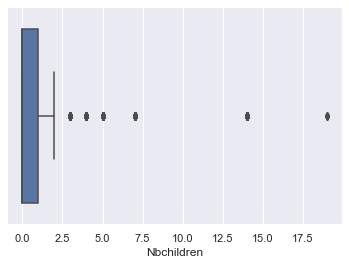

In [19]:
sns.boxplot(x=df["Nbchildren"]) ### correlated with number of family_member
print(df['Nbchildren'].value_counts().sort_values(ascending=False))
print()


In [20]:
number_Children_outlier = df['Nbchildren'].quantile(0.99)
df = df[df['Nbchildren'] < number_Children_outlier]

135000.0    88953
180000.0    67183
157500.0    61718
225000.0    61127
112500.0    60577
            ...  
51750.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name: Total_income_per_year, Length: 262, dtype: int64



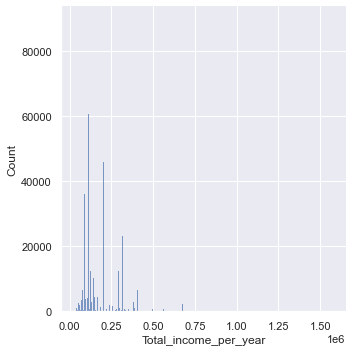

In [21]:
sns.displot(df, x="Total_income_per_year")
print(df['Total_income_per_year'].value_counts().sort_values(ascending=False))
print()

In [22]:
Total_income_per_year_outlier = df['Total_income_per_year'].quantile(0.99)
df = df[df['Total_income_per_year'] < Total_income_per_year_outlier]

2.0    420140
1.0    140078
3.0    132697
4.0     65973
Name: Nbfamily_member, dtype: int64


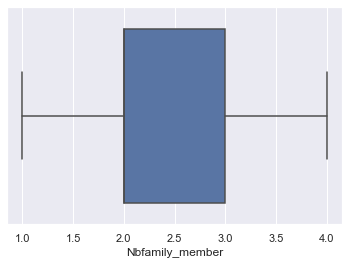

In [23]:
sns.boxplot(x=df["Nbfamily_member"])
print(df['Nbfamily_member'].value_counts().sort_values(ascending=False))

### might have high correlation with Number of children

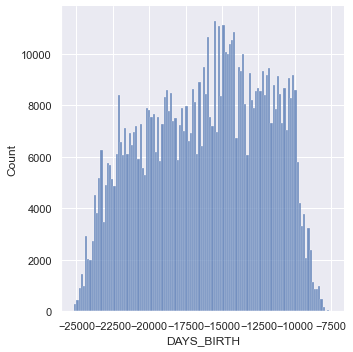

In [24]:
sns.displot(df,x='DAYS_BIRTH')


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

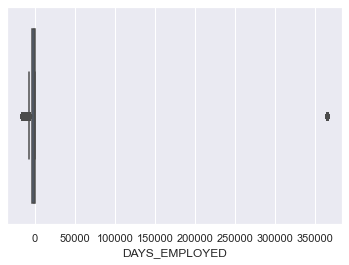

In [25]:
sns.boxplot(x=df['DAYS_EMPLOYED'])


In [26]:
df['DAYS_BIRTH']

0        -12005
1        -12005
2        -12005
3        -12005
4        -12005
          ...  
777710    -9188
777711    -9188
777712    -9188
777713    -9188
777714    -9188
Name: DAYS_BIRTH, Length: 758888, dtype: int64

In [27]:
## DEALING WITH NUMERICAL COLUMNS
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 12))
        ax=sns.countplot(y=df[categorical_columns], hue='Gender' , data=df)
        plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [28]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'],
      dtype='object')


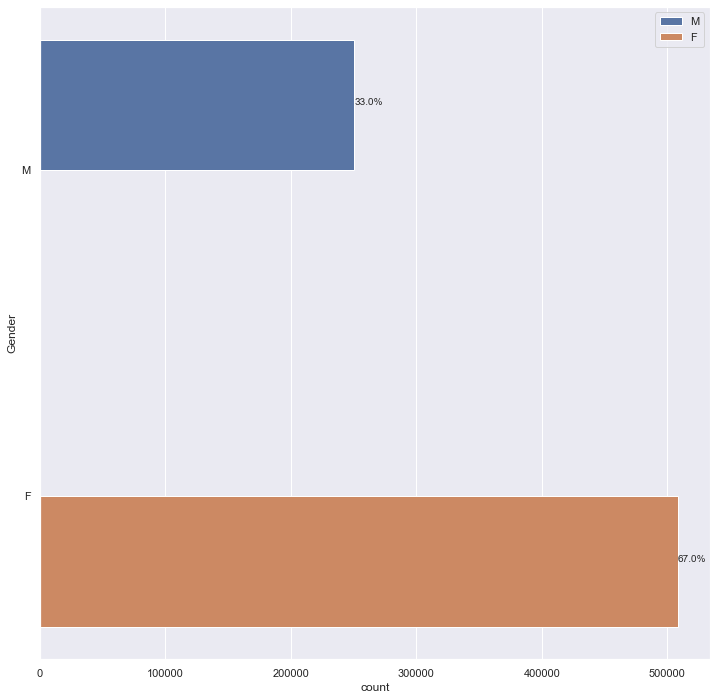

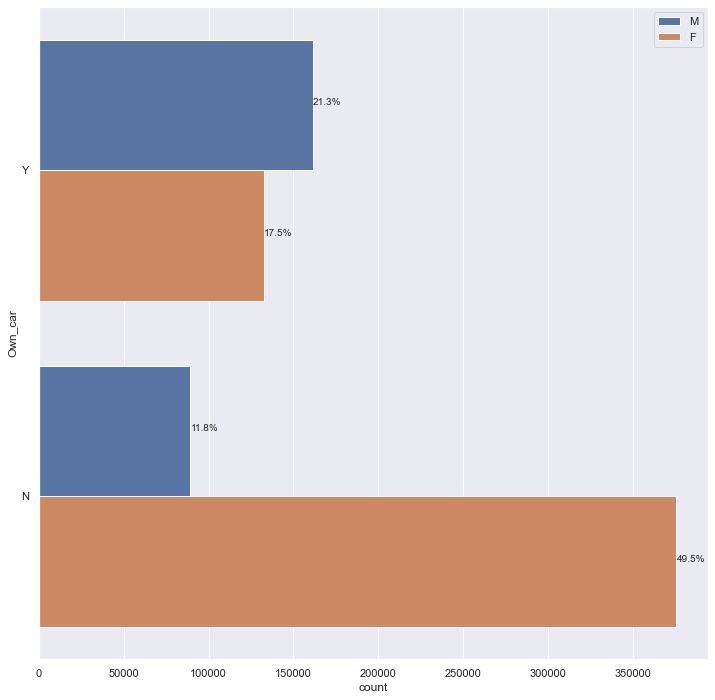

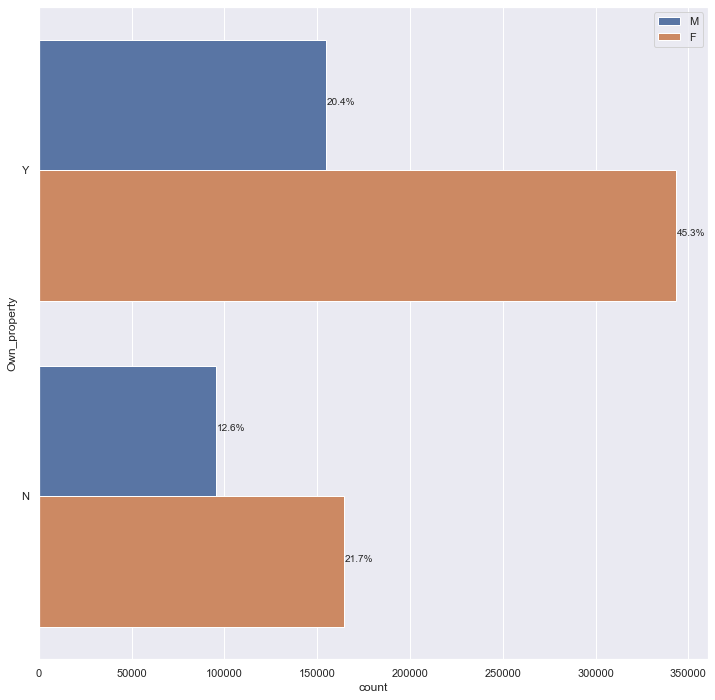

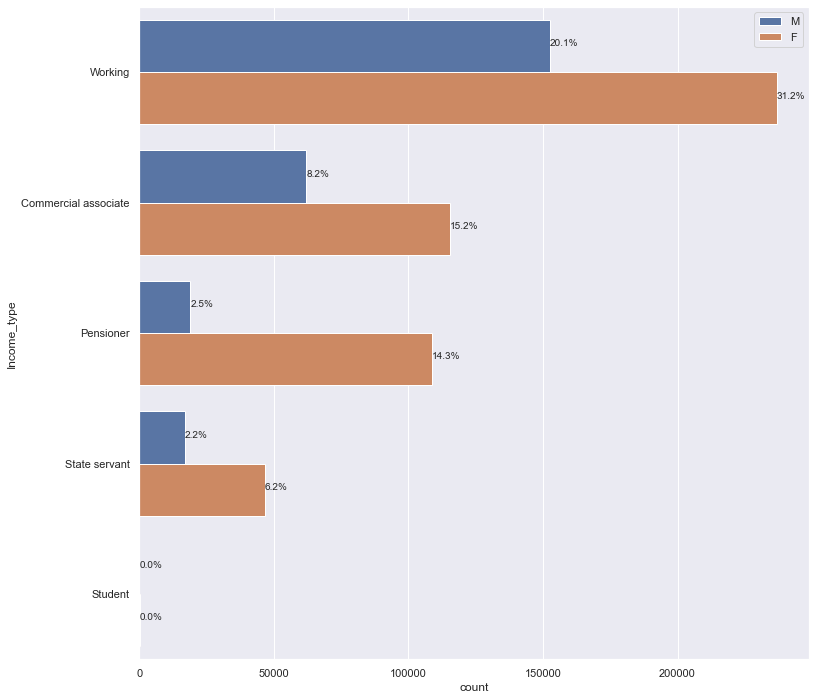

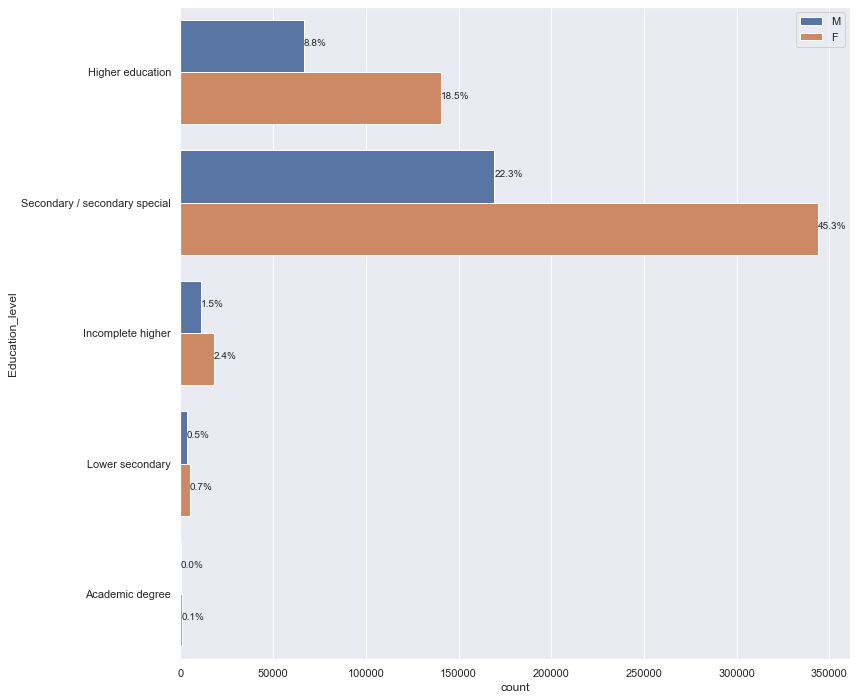

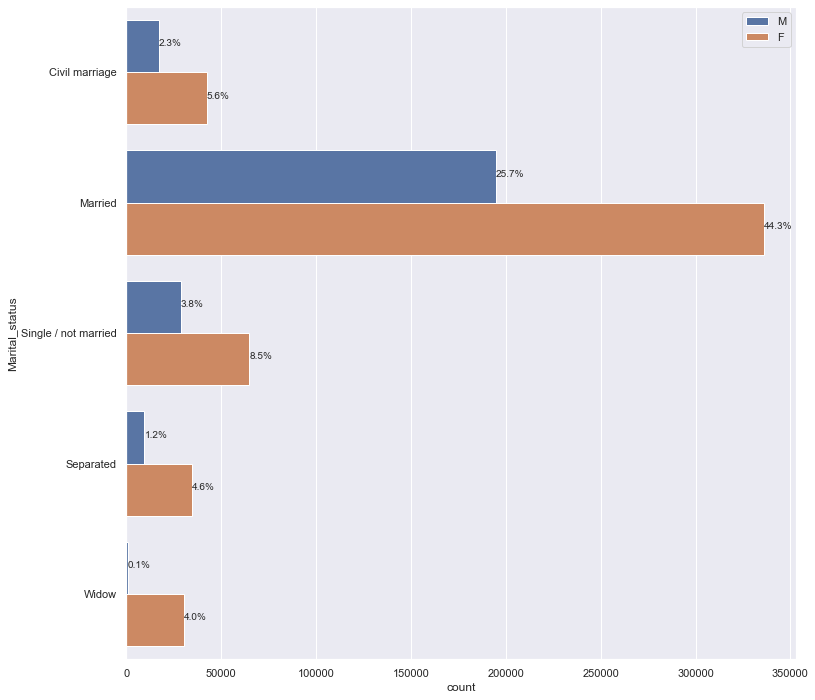

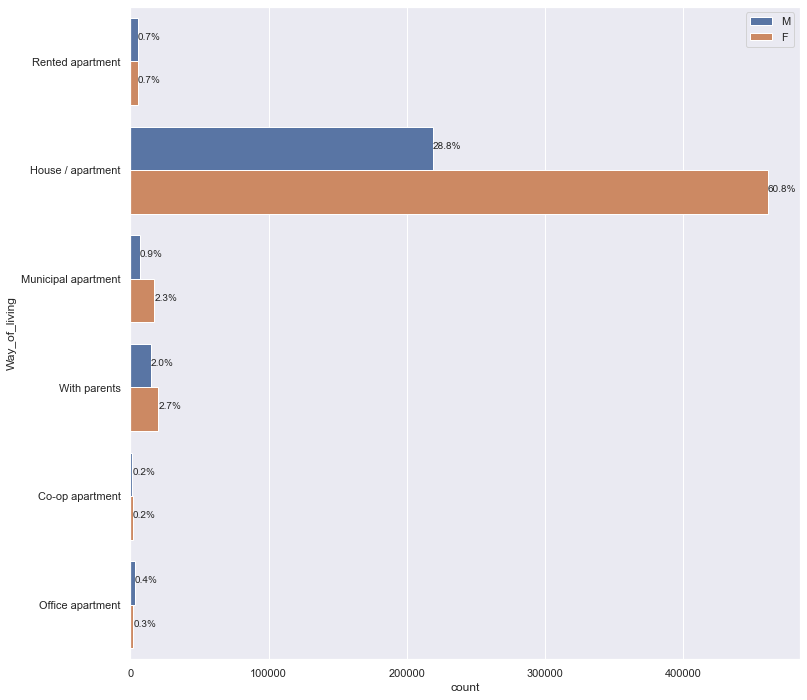

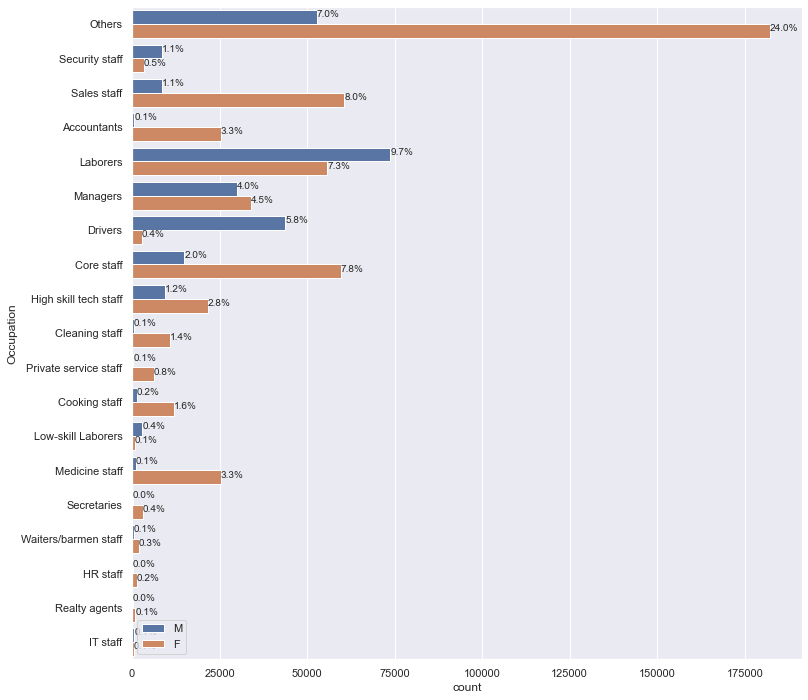

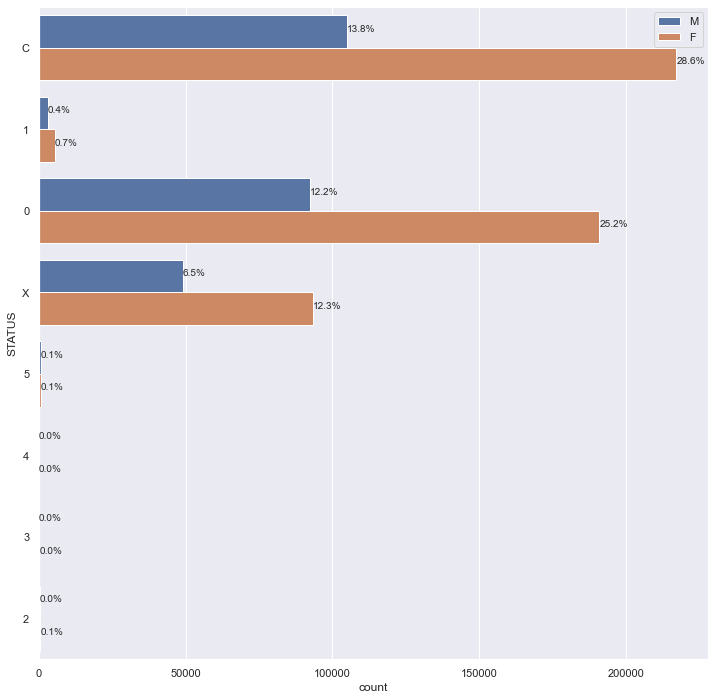

In [29]:
Categorical_countplot(['Gender','Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'])

### Feature engineering

In [30]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,DAYS_BIRTH,DAYS_EMPLOYED,Workphone,Phone,Email,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-12,0


In [31]:
df[df['ID'] == 5150482]

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,DAYS_BIRTH,DAYS_EMPLOYED,Workphone,Phone,Email,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS
171409,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-11,C
171410,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-12,C
171411,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-13,C
171412,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-14,C
171413,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-15,C
171414,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-16,C
171415,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-17,0
171416,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-18,0
171417,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-19,0
171418,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-20,0


In [32]:
### Feature engineering
### Labelled Y
credit_grouped=pd.get_dummies(data=df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(df['STATUS'].unique().tolist())].sum()
credit_grouped

,0,1,2,3,4,5,C,X
ID,,,,,,,,
5008804,1,1,0,0,0,0,13,1
5008805,1,1,0,0,0,0,12,1
5008806,7,0,0,0,0,0,7,16
5008808,2,0,0,0,0,0,0,3
5008809,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0
5150483,0,0,0,0,0,0,0,18
5150484,12,0,0,0,0,0,1,0


In [33]:
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'overdue_60_89',
                       '3':'overdue_90_119',
                       '4':'overdue_120_149',
                       '5':'overdue_over_150',
                       'C':'paid_off',
                        'X':'no_loan'})

overall_pastdue=['pastdue_1_29','pastdue_30_59',	'overdue_60_89',	'overdue_90_119'	,'overdue_120_149',	'overdue_over_150']
credit_grouped['Total_months_credit_registered']=df.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped['Delinquent_accounts']=credit_grouped[['overdue_60_89','overdue_90_119'	,'overdue_120_149'	,'overdue_over_150']].sum(axis=1)
credit_grouped['Ordinary_accounts']=credit_grouped[['pastdue_1_29','pastdue_30_59']].sum(axis=1)
credit_grouped['overall_pastdue']=credit_grouped[overall_pastdue].sum(axis=1)
credit_grouped['paid_pastdue_diff']=credit_grouped['paid_off']- credit_grouped['overall_pastdue']
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,overdue_60_89,overdue_90_119,overdue_120_149,overdue_over_150,paid_off,no_loan,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16,0,2,2,11
5008805,1,1,0,0,0,0,12,1,15,0,2,2,10
5008806,7,0,0,0,0,0,7,16,30,0,7,7,0
5008808,2,0,0,0,0,0,0,3,5,0,2,2,-2
5008809,0,0,0,0,0,0,0,5,5,0,0,0,0


In [34]:
target =[]
for index,row in credit_grouped.iterrows() :
  if row['paid_pastdue_diff'] >=3 or (row ['no_loan']==row['Total_months_credit_registered']):
    target.append(0)
  elif row['overall_pastdue'] == row['Ordinary_accounts']:
    target.append(0)
  elif row['paid_pastdue_diff'] >-2 and row['paid_pastdue_diff'] <3 and (row['Ordinary_accounts'] >=row['Delinquent_accounts']) :
    target.append(0)
  else:
    target.append(1)

credit_grouped['Risk']=target
credit_grouped['Risk'].value_counts()

0    35191
1      399
Name: Risk, dtype: int64

In [35]:
credit_grouped

,pastdue_1_29,pastdue_30_59,overdue_60_89,overdue_90_119,overdue_120_149,overdue_over_150,paid_off,no_loan,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue,paid_pastdue_diff,Risk
ID,,,,,,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16,0,2,2,11,0
5008805,1,1,0,0,0,0,12,1,15,0,2,2,10,0
5008806,7,0,0,0,0,0,7,16,30,0,7,7,0,0
5008808,2,0,0,0,0,0,0,3,5,0,2,2,-2,0
5008809,0,0,0,0,0,0,0,5,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18,0,12,12,-6,0
5150483,0,0,0,0,0,0,0,18,18,0,0,0,0,0
5150484,12,0,0,0,0,0,1,0,13,0,12,12,-11,0


In [36]:
features=['no_loan',	'Total_months_credit_registered',	'Delinquent_accounts',	'Ordinary_accounts',	'overall_pastdue','paid_pastdue_diff','Risk']
columns_credit= credit_grouped.loc[:,features]

In [37]:
df = df.merge(columns_credit,how='inner',on='ID')

In [38]:
df = function.select_first_month(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32338 entries, 0 to 32337
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              32338 non-null  int64  
 1   Gender                          32338 non-null  object 
 2   Own_car                         32338 non-null  object 
 3   Own_property                    32338 non-null  object 
 4   Nbchildren                      32338 non-null  int64  
 5   Total_income_per_year           32338 non-null  float64
 6   Income_type                     32338 non-null  object 
 7   Education_level                 32338 non-null  object 
 8   Marital_status                  32338 non-null  object 
 9   Way_of_living                   32338 non-null  object 
 10  DAYS_BIRTH                      32338 non-null  int64  
 11  DAYS_EMPLOYED                   32338 non-null  int64  
 12  Workphone                       

In [40]:
def convert_day_to_year(days):
    days = round(days/-365,0)
    return days

In [41]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day_to_year)
df['Total_income_lifetime_employed'] = df['Experience'] * df['Total_income_per_year']
df['Working_year_proportion'] = df['Experience'] / df['Age']

df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

<AxesSubplot:>

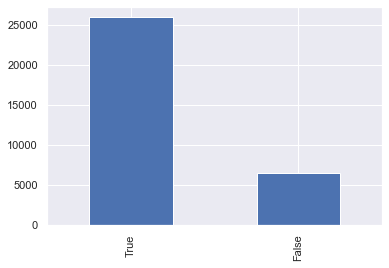

In [42]:
(df['Experience'] > 0).value_counts().plot(kind="bar")
### True is number of people who unemployment

In [43]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [44]:
df['Employment_status'] = df['Experience'].apply(employment_status)

<AxesSubplot:ylabel='Employment_status'>

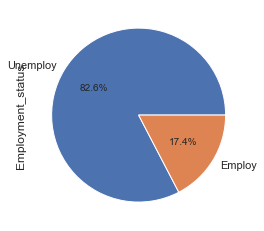

In [45]:
df['Employment_status'].value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Unemploy","Employ"])
## 82.6 percent of people are unemployed while only 17.4 percent are employed

df = function.select_first_month(df)

In [46]:
def Risk_evaluation(score):
    risk_range = [1,2,3,4,5]
    if score in risk_range:
        return '1'
    else:
        return '0'


## 1 risk 0 No 

0    1.0
Name: Risk1, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


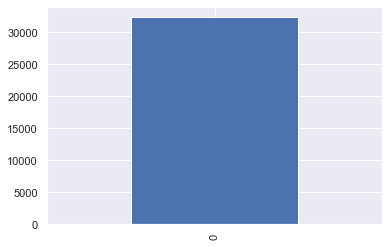

In [47]:
df['Risk1'] = df['STATUS'].apply(Risk_evaluation)
print(df['Risk1'].value_counts(normalize=True))
print(df['Risk1'].value_counts().plot(kind='bar'))
## Imbalance dataset


In [48]:
df['Risk'].value_counts()

0    31939
1      399
Name: Risk, dtype: int64

### DATA VISUALIZING

In [49]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,...,Ordinary_accounts,overall_pastdue,paid_pastdue_diff,Risk,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status,Risk1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,2,11,0,33,12.0,5130000.0,0.363636,Employment,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,2,10,0,33,12.0,5130000.0,0.363636,Employment,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,7,7,0,0,59,3.0,337500.0,0.050847,Employment,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,2,2,-2,0,52,8.0,2160000.0,0.153846,Employment,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,6,6,9,0,52,8.0,2160000.0,0.153846,Employment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333,5150480,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,6,6,14,0,30,5.0,787500.0,0.166667,Employment,0
32334,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,12,12,-6,0,30,5.0,787500.0,0.166667,Employment,0
32335,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,12,12,-11,0,30,5.0,787500.0,0.166667,Employment,0
32336,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,2,-2,0,30,5.0,787500.0,0.166667,Employment,0


In [50]:
columns = df.columns
columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'no_loan',
       'Total_months_credit_registered', 'Delinquent_accounts',
       'Ordinary_accounts', 'overall_pastdue', 'paid_pastdue_diff', 'Risk',
       'Age', 'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk1'],
      dtype='object')

In [51]:
### drop unnecessary columns
df.drop('ID',axis=1,inplace=True)
df.drop('MONTHS_BALANCE',axis=1,inplace=True)
df.drop('STATUS',axis=1,inplace=True)

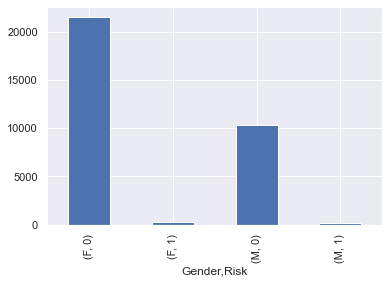

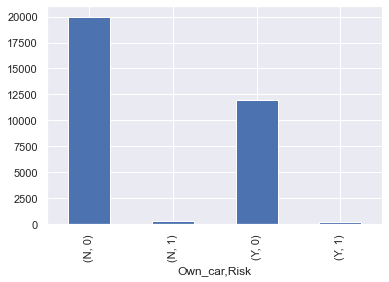

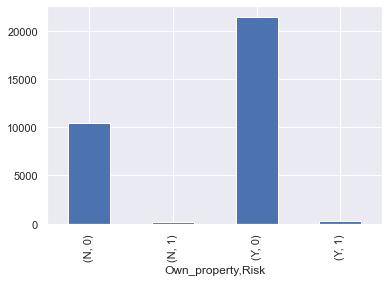

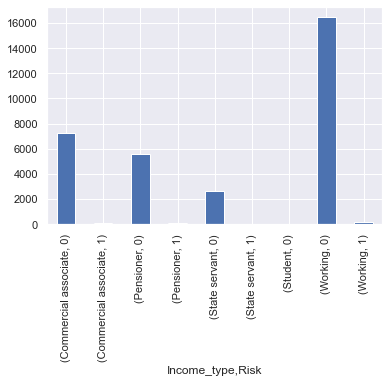

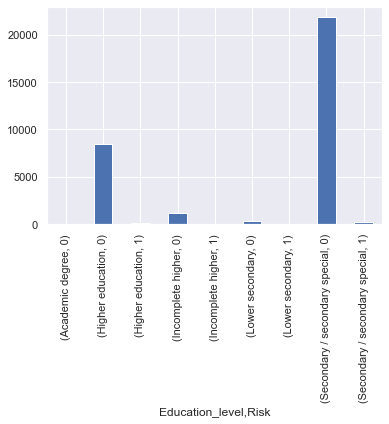

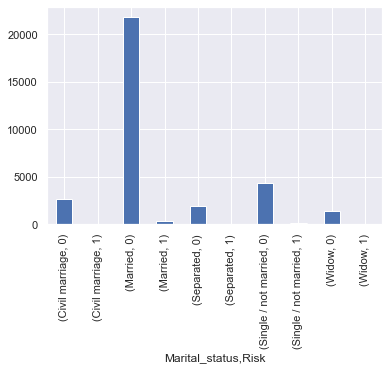

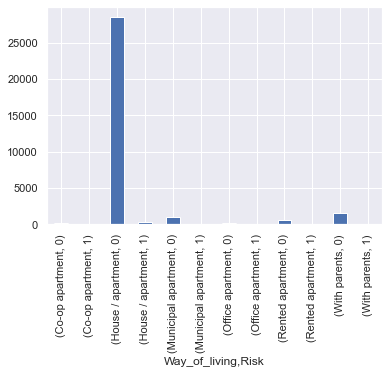

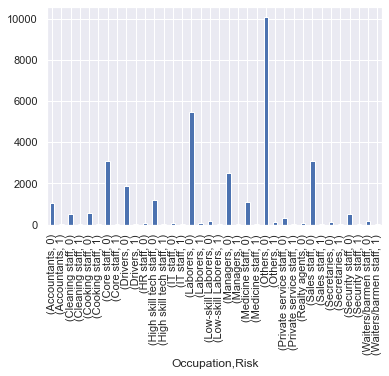

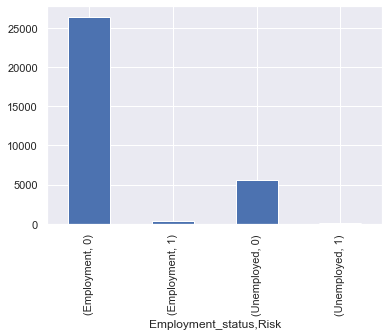

In [52]:
column = ['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status']
for variable in column:
    df.groupby(variable)['Risk'].value_counts().plot(kind='bar')
    plt.show()


In [53]:
df

,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,...,Ordinary_accounts,overall_pastdue,paid_pastdue_diff,Risk,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status,Risk1
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,2,11,0,33,12.0,5130000.0,0.363636,Employment,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,2,10,0,33,12.0,5130000.0,0.363636,Employment,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,7,7,0,0,59,3.0,337500.0,0.050847,Employment,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,2,2,-2,0,52,8.0,2160000.0,0.153846,Employment,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,6,6,9,0,52,8.0,2160000.0,0.153846,Employment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,6,6,14,0,30,5.0,787500.0,0.166667,Employment,0
32334,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,12,12,-6,0,30,5.0,787500.0,0.166667,Employment,0
32335,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,12,12,-11,0,30,5.0,787500.0,0.166667,Employment,0
32336,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,2,2,-2,0,30,5.0,787500.0,0.166667,Employment,0


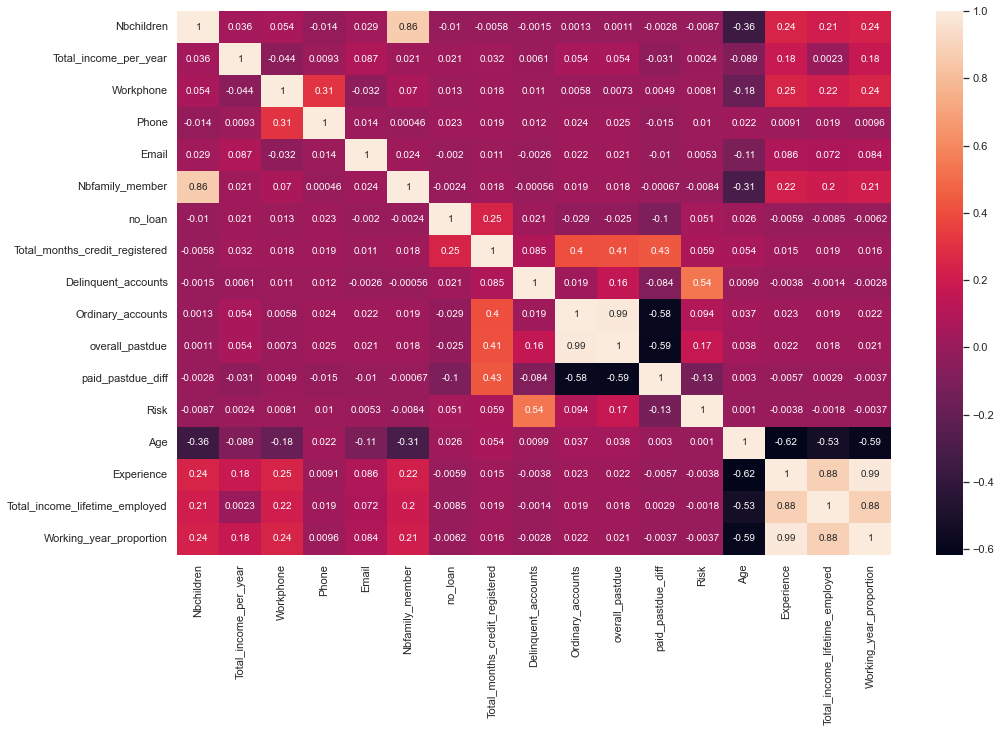

In [54]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [55]:
df.corr().columns

Index(['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'no_loan', 'Total_months_credit_registered',
       'Delinquent_accounts', 'Ordinary_accounts', 'overall_pastdue',
       'paid_pastdue_diff', 'Risk', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Working_year_proportion'],
      dtype='object')

### DATA PREPROCESSING

In [56]:
df['Risk'] = df['Risk'].astype('int')

In [57]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

In [58]:
X['Rand'] = np.random.randint(1,3,len(X))

In [59]:
X.select_dtypes(include=['object', 'category']).columns

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status',
       'Risk1'],
      dtype='object')

In [60]:
X.select_dtypes(include='number').columns

Index(['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'no_loan', 'Total_months_credit_registered',
       'Delinquent_accounts', 'Ordinary_accounts', 'overall_pastdue',
       'paid_pastdue_diff', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Working_year_proportion', 'Rand'],
      dtype='object')

In [61]:
X =  X[['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status','Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'no_loan', 'Total_months_credit_registered',
       'Delinquent_accounts', 'Ordinary_accounts', 'overall_pastdue',
       'paid_pastdue_diff', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Working_year_proportion','Rand']]

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32338 entries, 0 to 32337
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          32338 non-null  object 
 1   Own_car                         32338 non-null  object 
 2   Own_property                    32338 non-null  object 
 3   Income_type                     32338 non-null  object 
 4   Education_level                 32338 non-null  object 
 5   Marital_status                  32338 non-null  object 
 6   Way_of_living                   32338 non-null  object 
 7   Occupation                      32338 non-null  object 
 8   Employment_status               32338 non-null  object 
 9   Nbchildren                      32338 non-null  int64  
 10  Total_income_per_year           32338 non-null  float64
 11  Workphone                       32338 non-null  int64  
 12  Phone                           

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [64]:
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features = range(0,9),k_neighbors=4)
X_train_balanced,y_train_balanced = oversample.fit_resample(X_train, y_train)

In [65]:
from sklearn.feature_extraction import DictVectorizer
encoded = DictVectorizer(sparse=False)
X_train_dict = encoded.fit_transform(X_train_balanced.to_dict('records'))
X_test_dict  = encoded.transform(X_test.to_dict('records'))
print(X_train_dict.shape)
print(X_train_dict)

(44712, 65)
[[ 34.   0.   0. ...   6.  20. -20.]
 [ 33.   0.   0. ...   0.  10.  -1.]
 [ 65.   0.   0. ...   0.   5.  25.]
 ...
 [ 26.   3.   0. ...   1.   9.  -9.]
 [ 44.  15.   0. ...   0.  19. -19.]
 [ 29.   1.   0. ...   0.   9.  -9.]]


In [66]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dict)
X_test_scaled = scaler.transform(X_test_dict)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score

Logit = LogisticRegression()
Logit.fit(X_train_scaled, y_train_balanced)

print('Logistic Model Accuracy : ', Logit.score(X_test_scaled, y_test)*100, '%')

prediction = Logit.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test, prediction))



Logistic Model Accuracy :  99.63924963924964 %

Confusion matrix :
[[9548   35]
 [   0  119]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       0.77      1.00      0.87       119

    accuracy                           1.00      9702
   macro avg       0.89      1.00      0.93      9702
weighted avg       1.00      1.00      1.00      9702

\ROC_AUC_SCORE report:
0.9981738495252009


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from sklearn.tree import DecisionTreeClassifier

### Write in function

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train_scaled, y_train_balanced)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test_scaled, y_test)*100, '%')

prediction = decision_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test, prediction))

Decision Tree Model Accuracy :  99.98969284683571 %

Confusion matrix :
[[9582    1]
 [   0  119]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       0.99      1.00      1.00       119

    accuracy                           1.00      9702
   macro avg       1.00      1.00      1.00      9702
weighted avg       1.00      1.00      1.00      9702

\ROC_AUC_SCORE report:
0.9999478242721487


In [69]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_scaled, y_train_balanced)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test_scaled, y_test)*100, '%')

prediction = svc_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Support Vector Classifier Accuracy :  99.29911358482786 %

Confusion matrix :
[[9546   37]
 [  31   88]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       0.70      0.74      0.72       119

    accuracy                           0.99      9702
   macro avg       0.85      0.87      0.86      9702
weighted avg       0.99      0.99      0.99      9702

\ROC_AUC_SCORE report:
0.867817397229162


In [70]:
from sklearn.ensemble import RandomForestClassifier

Random_model  = RandomForestClassifier(max_depth=12,min_samples_leaf=16)

Random_model.fit(X_train_scaled, y_train_balanced)

print('Random forest Model Accuracy : ', Random_model.score(X_test_scaled, y_test)*100, '%')

prediction = Random_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Random forest Model Accuracy :  99.9793856936714 %

Confusion matrix :
[[9581    2]
 [   0  119]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       0.98      1.00      0.99       119

    accuracy                           1.00      9702
   macro avg       0.99      1.00      1.00      9702
weighted avg       1.00      1.00      1.00      9702

\ROC_AUC_SCORE report:
0.9998956485442971


In [71]:
from lightgbm import LGBMClassifier
LGBM_model  = LGBMClassifier()

LGBM_model.fit(X_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', LGBM_model.score(X_test_scaled, y_test)*100, '%')

prediction = LGBM_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Light GBM Model Accuracy :  100.0 %

Confusion matrix :
[[9583    0]
 [   0  119]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       1.00      1.00      1.00       119

    accuracy                           1.00      9702
   macro avg       1.00      1.00      1.00      9702
weighted avg       1.00      1.00      1.00      9702

\ROC_AUC_SCORE report:
1.0


In [72]:
from xgboost import XGBClassifier
XGB_model  =XGBClassifier(use_label_encoder=False)

XGB_model.fit(X_train_scaled, y_train_balanced)

print('Xg Boost Model Accuracy : ', XGB_model.score(X_test_scaled, y_test)*100, '%')

prediction = XGB_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[16:04:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xg Boost Model Accuracy :  100.0 %

Confusion matrix :
[[9583    0]
 [   0  119]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9583
           1       1.00      1.00      1.00       119

    accuracy                           1.00      9702
   macro avg       1.00      1.00      1.00      9702
weighted avg       1.00      1.00      1.00      9702

\ROC_AUC_SCORE report:
1.0


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
   'max_depth' : range(5,20,5),
    'min_samples_leaf' : range(50,210,50),
    'min_samples_split' : range(50,210,50),
    'criterion' : ['gini','entropy']
}
grid = GridSearchCV(Random_model, param_grid, cv = 5)
grid

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12,
                                              min_samples_leaf=16),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 210, 50),
                         'min_samples_split': range(50, 210, 50)})

In [74]:
grid.fit(X_train_scaled,y_train_balanced)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12,
                                              min_samples_leaf=16),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 210, 50),
                         'min_samples_split': range(50, 210, 50)})

In [75]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [76]:
grid.cv_results_

{'mean_fit_time': array([2.99826579, 4.35167856, 3.27433019, 2.95461774, 2.95323739,
        7.10792952, 4.63989735, 3.13210826, 2.69810514, 2.69000936,
        2.74475312, 2.7287786 , 5.990095  , 2.99615402, 2.66441369,
        2.87402396, 4.17056627, 4.212363  , 3.85072489, 3.66876392,
        3.89381399, 3.51305819, 3.37368536, 3.36319356, 3.28977656,
        3.42988477, 3.29654336, 3.23776355, 3.43147192, 4.71580958,
        4.52980938, 4.73201251, 5.90909224, 3.80414257, 3.59178867,
        3.49538727, 3.43279214, 3.50035458, 3.6885798 , 5.04697642,
        3.57156477, 3.41621647, 3.43343635, 3.33027306, 3.31464477,
        3.23516092, 3.2761384 , 3.27493849, 3.03821397, 3.17529573,
        3.03621998, 2.99195967, 3.11105919, 4.3487936 , 2.9816946 ,
        3.01788077, 2.84233117, 2.8326529 , 2.81745849, 2.98081551,
        2.65790582, 2.69836807, 4.2006743 , 6.20823417, 6.98613315,
        6.14545207, 4.25084372, 3.64402623, 3.54804225, 3.37906203,
        3.6614614 , 6.0990201 ,

In [77]:
grid.best_score_

0.999261937598128

In [78]:
Random_best_model = grid.best_estimator_

In [79]:
final_model = Random_best_model.fit(X_train_scaled,y_train_balanced)

In [80]:
final_model.score(X_test_scaled,y_test)

0.9984539270253556

In [81]:
test = X.iloc[9,:].to_dict()
test

{'Gender': 'M',
 'Own_car': 'Y',
 'Own_property': 'Y',
 'Income_type': 'Working',
 'Education_level': 'Higher education',
 'Marital_status': 'Married',
 'Way_of_living': 'House / apartment',
 'Occupation': 'Accountants',
 'Employment_status': 'Employment',
 'Nbchildren': 0,
 'Total_income_per_year': 270000.0,
 'Workphone': 1,
 'Phone': 1,
 'Email': 1,
 'Nbfamily_member': 2.0,
 'no_loan': 0,
 'Total_months_credit_registered': 6,
 'Delinquent_accounts': 0,
 'Ordinary_accounts': 6,
 'overall_pastdue': 6,
 'paid_pastdue_diff': -6,
 'Age': 46,
 'Experience': 2.0,
 'Total_income_lifetime_employed': 540000.0,
 'Working_year_proportion': 0.043478260869565216,
 'Rand': 2}

In [83]:
test = {'Gender': 'M',
 'Own_car': 'Y',
 'Own_property': 'Y',
 'Income_type': 'Working',
 'Education_level': 'Higher education',
 'Marital_status': 'Married',
 'Way_of_living': 'House / apartment',
 'Occupation': 'Accountants',
 'Employment_status': 'Employment',
 'Nbchildren': 0,
 'Total_income_per_year': 270000.0,
 'Workphone': 1,
 'Phone': 1,
 'Email': 1,
 'Nbfamily_member': 2.0,
 'Age': 46,
 'Experience': 2.0,
 'Total_income_lifetime_employed': 540000.0}

test_encoded = encoded.transform(test)
test_scaler = scaler.transform(test_encoded)

In [84]:
final_model.predict(test_scaler)

array([0])

In [85]:
final_model

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=50)

In [86]:
test = pd.DataFrame(encoded.get_feature_names_out(),final_model.feature_importances_).reset_index()

In [87]:
test.sort_values(by = "index", ascending = False).head(65)
### Add the random variables in case some features lower than Random variable isn't insignificant

,index,0
1,0.581777,Delinquent_accounts
64,0.121741,paid_pastdue_diff
63,0.087712,overall_pastdue
44,0.039886,Ordinary_accounts
53,0.033999,Total_months_credit_registered
...,...,...
57,0.000000,Way_of_living=Office apartment
39,0.000000,Occupation=Realty agents
43,0.000000,Occupation=Waiters/barmen staff
2,0.000000,Education_level=Academic degree


In [88]:
estimator = final_model.estimators_[0]

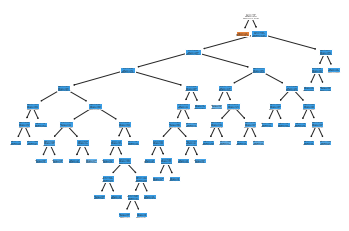

In [89]:
from sklearn import tree
tree_model = tree.plot_tree(estimator,filled=True)

In [90]:
import pickle

In [91]:
C=1.0

In [92]:
output_file = f'Model_C={C}.bin'
output_file

'Model_C=1.0.bin'

In [93]:
### save the model
with open(output_file, 'wb') as file_out:
    pickle.dump((encoded,scaler,final_model),file_out)

In [ ]:
import pickle
with open("Model_C=1.0.bin", 'rb') as file_in:
    encoded,scaler,final_model = pickle.load(file_in)

In [94]:
test = {'Gender': 'M',
 'Own_car': 'Y',
 'Own_property': 'Y',
 'Income_type': 'Working',
 'Education_level': 'Higher education',
 'Marital_status': 'Married',
 'Way_of_living': 'House / apartment',
 'Occupation': 'Accountants',
 'Employment_status': 'Employment',
 'Nbchildren': 0,
 'Total_income_per_year': 270000.0,
 'Workphone': 1,
 'Phone': 1,
 'Email': 1,
 'Nbfamily_member': 2.0,
 'Age': 46,
 'Experience': 2.0,
 'Total_income_lifetime_employed': 540000.0}